In [14]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
data, label = [], []

In [16]:
root_dir = "chest_xray/chest_xray/train"

In [17]:
for folder in os.listdir(root_dir):
    for file in os.listdir(os.path.join(root_dir, folder)):
        if file.endswith(".jpeg"):
            img = cv2.imread(os.path.join(root_dir, folder, file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (64, 64))
            label.append(folder)
            data.append(img)
            
        else:
            continue

In [18]:
len(data), len(label)

(5216, 5216)

In [19]:
data = np.array(data)
label = np.array(label)

In [20]:
le = LabelEncoder()
y = le.fit_transform(label)

In [21]:
y = to_categorical(y, 2)
X = data / 255

In [22]:
X.shape, y.shape

((5216, 64, 64, 3), (5216, 2))

In [23]:
np.unique(y, return_counts=True)

(array([0., 1.], dtype=float32), array([5216, 5216]))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [29]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(64, 64, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(128, activation="relu"),
    Dense(2, activation="sigmoid"),
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

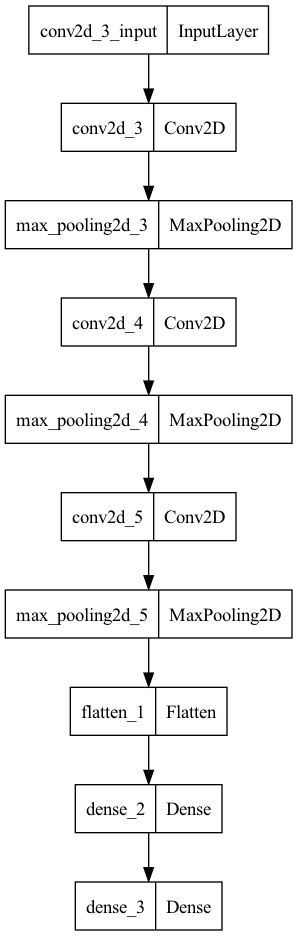

In [31]:
plot_model(model)

In [32]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
131/131 [==============================] - 6s 40ms/step - loss: 0.3416 - accuracy: 0.8512 - val_loss: 0.1507 - val_accuracy: 0.9406
Epoch 2/10
131/131 [==============================] - 5s 39ms/step - loss: 0.1453 - accuracy: 0.9403 - val_loss: 0.1955 - val_accuracy: 0.9243
Epoch 3/10
131/131 [==============================] - 5s 39ms/step - loss: 0.1009 - accuracy: 0.9609 - val_loss: 0.1191 - val_accuracy: 0.9550
Epoch 4/10
131/131 [==============================] - 5s 39ms/step - loss: 0.0808 - accuracy: 0.9710 - val_loss: 0.1027 - val_accuracy: 0.9617
Epoch 5/10
131/131 [==============================] - 5s 40ms/step - loss: 0.0687 - accuracy: 0.9746 - val_loss: 0.1041 - val_accuracy: 0.9636
Epoch 6/10
131/131 [==============================] - 5s 40ms/step - loss: 0.0702 - accuracy: 0.9746 - val_loss: 0.1115 - val_accuracy: 0.9617
Epoch 7/10
131/131 [==============================] - 5s 41ms/step - loss: 0.0514 - accuracy: 0.9777 - val_loss: 0.0930 - val_accuracy: 0.9722

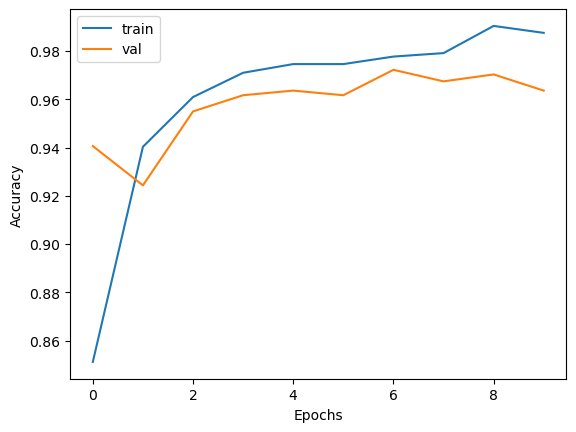

In [33]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

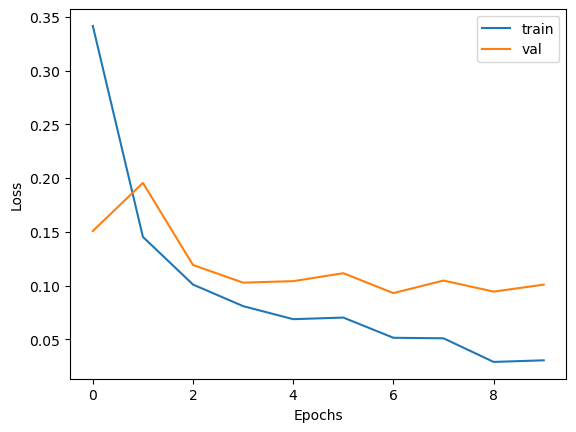

In [34]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [35]:
model.save("PneumoniaModel.h5")

In [36]:
X_test.shape, y_test.shape

((1044, 64, 64, 3), (1044, 2))

In [38]:
rand_idx = np.random.randint(0, 1044)

In [39]:
image = X_test[rand_idx]
label = y_test[rand_idx]

In [40]:
preds = model.predict(np.expand_dims(image, axis=0))

1/1 [==============================] - 0s 63ms/step


In [41]:
predicted = np.argmax(preds)

In [44]:
# 0 -> Normal, 1 -> PNEUMONIA
print("Predicted: ", predicted)
print("Actual: ", label) # [0. 1.] = 1 (index)

Predicted:  1
Actual:  [0. 1.]


In [43]:
le.classes_

array(['NORMAL', 'PNEUMONIA'], dtype='<U9')